In [30]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.datasets import fetch_20newsgroups
import gensim
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from gensim.models import Word2Vec
import numpy as np

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
# Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
documents = newsgroups.data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
# Text Preprocessing
def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    tokens = [token for token in tokens if token.isalpha()]  # Remove punctuation
    tokens = [token for token in tokens if token not in stopwords.words('english')]  # Remove stopwords
    return tokens

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
# Apply preprocessing to the documents
preprocessed_documents = [preprocess_text(doc) for doc in documents]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
# Create a dictionary and a corpus
dictionary = corpora.Dictionary(preprocessed_documents)
corpus = [dictionary.doc2bow(doc) for doc in preprocessed_documents]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
# Train the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
# Print the topics found by the LDA model
print("LDA Topics:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}")

LDA Topics:
Topic: 0 
Words: 0.011*"space" + 0.004*"center" + 0.004*"new" + 0.004*"earth" + 0.004*"nasa" + 0.004*"also" + 0.004*"launch" + 0.004*"april" + 0.003*"may" + 0.003*"university"
Topic: 1 
Words: 0.016*"team" + 0.012*"game" + 0.011*"games" + 0.009*"play" + 0.009*"year" + 0.008*"season" + 0.007*"league" + 0.007*"gm" + 0.007*"nhl" + 0.006*"win"
Topic: 2 
Words: 0.008*"get" + 0.007*"would" + 0.007*"one" + 0.007*"use" + 0.006*"like" + 0.006*"know" + 0.005*"anyone" + 0.005*"thanks" + 0.005*"also" + 0.005*"windows"
Topic: 3 
Words: 0.038*"p" + 0.038*"x" + 0.034*"r" + 0.034*"q" + 0.033*"g" + 0.031*"max" + 0.030*"n" + 0.026*"c" + 0.025*"w" + 0.025*"b"
Topic: 4 
Words: 0.018*"card" + 0.007*"system" + 0.007*"bus" + 0.007*"dos" + 0.006*"scsi" + 0.006*"cards" + 0.006*"controller" + 0.006*"drivers" + 0.005*"windows" + 0.005*"ide"
Topic: 5 
Words: 0.009*"would" + 0.007*"one" + 0.006*"people" + 0.005*"use" + 0.004*"may" + 0.004*"government" + 0.003*"could" + 0.003*"also" + 0.003*"like" + 0.0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
# Prepare the visualization
lda_display = gensimvis.prepare(lda_model, corpus, dictionary)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Prepare the LDA visualization data
lda_display = gensimvis.prepare(lda_model, corpus, dictionary)

# Display the visualization inline in the notebook
pyLDAvis.display(lda_display)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
# Train Word2Vec model on the preprocessed documents
word2vec_model = Word2Vec(sentences=preprocessed_documents, vector_size=100, window=5, min_count=5, workers=4)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
# Represent each document as the average of word vectors
def document_vector(doc):
    # Remove out-of-vocabulary words
    doc = [word for word in doc if word in word2vec_model.wv.index_to_key]
    if len(doc) > 0:
        return np.mean(word2vec_model.wv[doc], axis=0)
    else:
        return np.zeros(word2vec_model.vector_size)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
# Get vectors for each document
doc_vectors = [document_vector(doc) for doc in preprocessed_documents]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
# Remove documents that may have failed (zero vectors)
doc_vectors = np.array([vec for vec in doc_vectors if vec is not None and np.any(vec)])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
# Calculate cosine similarity between document vectors
cosine_similarities = cosine_similarity(doc_vectors)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
# Cluster documents using KMeans
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(doc_vectors)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


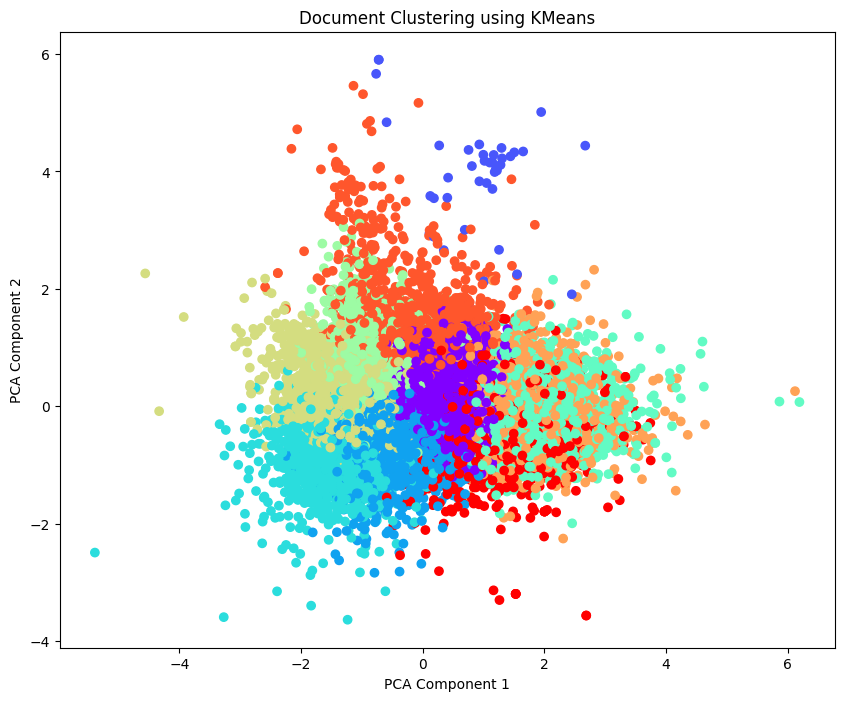

In [54]:
# Visualize clusters using PCA
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(doc_vectors)
plt.figure(figsize=(10, 8))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c=labels, cmap='rainbow')
plt.title('Document Clustering using KMeans')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [55]:
# Comparison of document similarity using LDA-based vectors
lda_doc_vectors = [lda_model.get_document_topics(bow, minimum_probability=0.0) for bow in corpus]
lda_doc_vectors = [[prob for topic, prob in doc] for doc in lda_doc_vectors]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
# Remove any empty vectors
lda_doc_vectors = np.array([vec for vec in lda_doc_vectors if vec])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [57]:
# Calculate cosine similarity for LDA-based vectors
lda_cosine_similarities = cosine_similarity(lda_doc_vectors)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
# Output LDA and word embedding similarities
print("Cosine Similarity using Word Embeddings:")
print(cosine_similarities)

Cosine Similarity using Word Embeddings:
[[1.0000001  0.4236099  0.70374984 ... 0.62581694 0.73069596 0.7768752 ]
 [0.4236099  1.0000001  0.22633523 ... 0.83519804 0.40918577 0.72831714]
 [0.70374984 0.22633523 1.         ... 0.38614562 0.6164024  0.679795  ]
 ...
 [0.62581694 0.83519804 0.38614562 ... 0.9999999  0.594677   0.8331283 ]
 [0.73069596 0.40918577 0.6164024  ... 0.594677   0.99999994 0.8536443 ]
 [0.7768752  0.72831714 0.679795   ... 0.8331283  0.8536443  1.        ]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
print("\nCosine Similarity using LDA-based Vectors:")
print(lda_cosine_similarities)


Cosine Similarity using LDA-based Vectors:
[[1.0000001  0.13549167 0.1568023  ... 0.00458035 0.6905712  0.32175258]
 [0.13549167 1.0000001  0.02892562 ... 0.07350464 0.10849323 0.1041107 ]
 [0.1568023  0.02892562 0.9999999  ... 0.00450711 0.28367308 0.16102795]
 ...
 [0.00458035 0.07350464 0.00450711 ... 1.0000001  0.01057361 0.8621452 ]
 [0.6905712  0.10849323 0.28367308 ... 0.01057361 0.99999994 0.47189143]
 [0.32175258 0.1041107  0.16102795 ... 0.8621452  0.47189143 0.99999994]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
!pip install pyLDAvis


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
